#  DESAFIO DS (HOUSING) - TRAINEE 09/2021  
#  RENNER BELO DE SOUZA  

### O desafio consiste na predição dos preços de casas na california, criando um modelo de machine learning capaz de predizer o preço mediano das casas em qualquer distrito dado os demais atributos. Para isso utiliza-se do dataset "housing.csv" ,porém é necessario uma serie de analises e pré processamento de dados antes da modelagem em si, para assim, desenvolver o modelo e testa-lo
     



# 1 - Análise dos Dados

### Importando as bibliotecas utilizadas

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from scipy import stats

### Carregando o Dataset 

In [2]:
#carregando no pandas
HOUSING_PATH = os.path.join("datasets", "housing")

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()

In [3]:
#primeiras 5 linhas (destritos) do dataset contendo as 10 colunas (atributos)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### De acordo com o tipo de dado de cada atributo, nota-se que o atributo ocean_proximity é o unico não numeral 

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Características básicas dos atributos numericos

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Histograma de cada atributo numérico

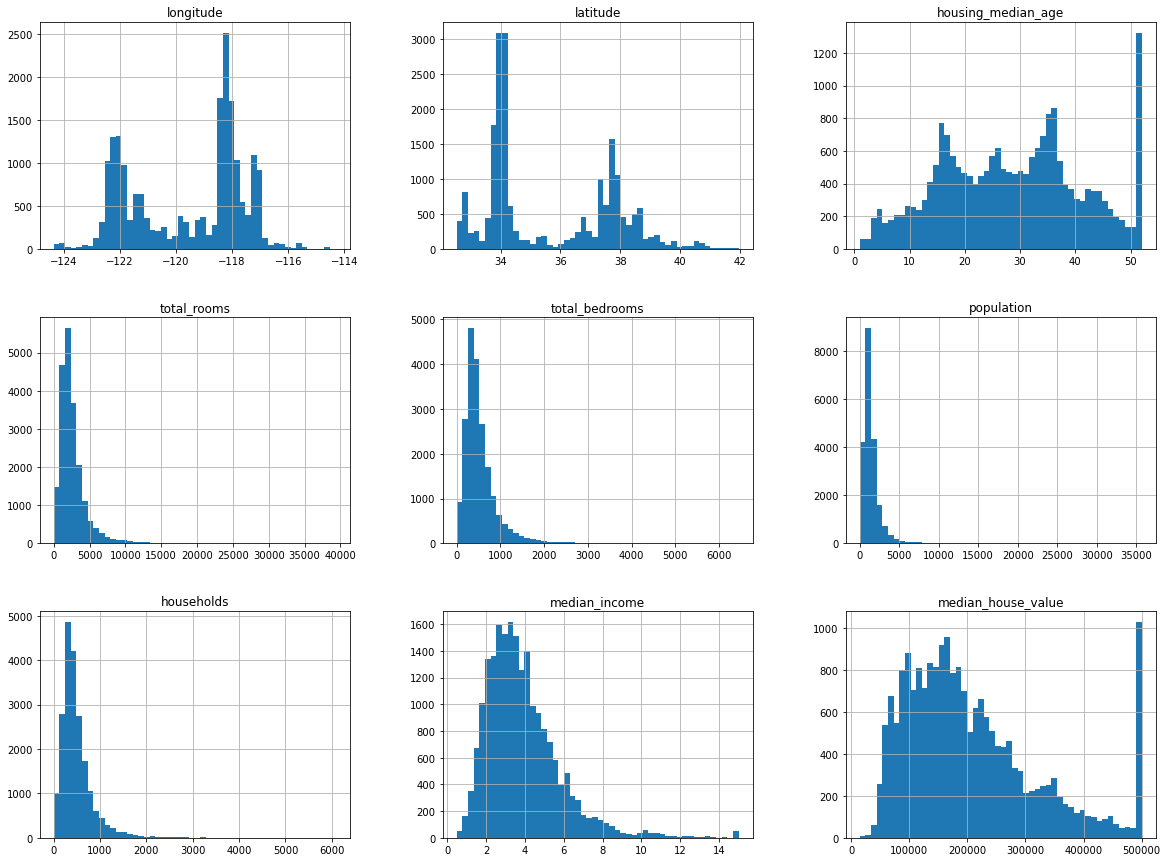

In [6]:
%matplotlib inline 
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Gráfico de dispersão dos dados pela california

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

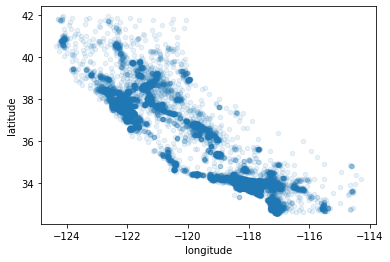

In [7]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

### Gráfico de dispersão com a população e mediana dos preços das casas

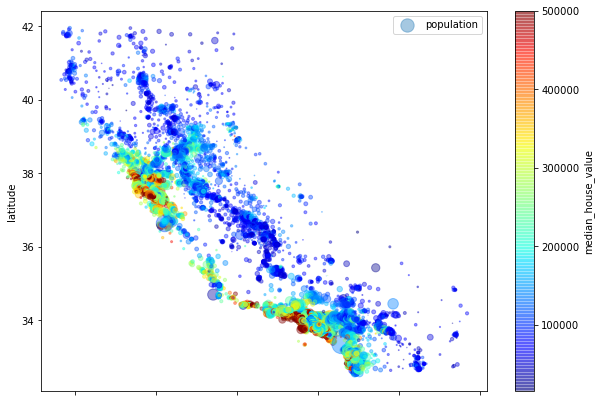

In [8]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()


### Heatmap da correlaçao de Pearson 

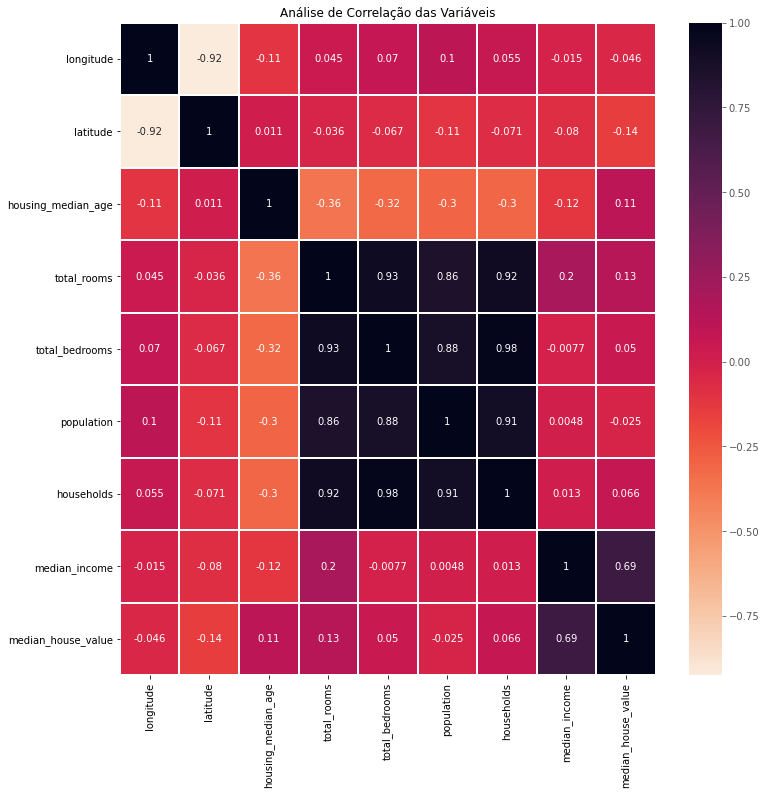

In [9]:
plt.figure(figsize = (12,12))
plt.title('Análise de Correlação das Variáveis')
plt.style.use('ggplot')
sns.heatmap(housing.corr(), linewidths = 1, cmap='rocket_r', annot=True);

### Correlação de Pearson referente ao preço médio das casas

In [10]:
corr = housing.corr()
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

#### Como visto anteriormente, o atributo com mais correlação com mediana dos preços das casas é a renda mediana, ou seja, quanto maior a renda maior o preço, como visto no grafico abaixo 

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

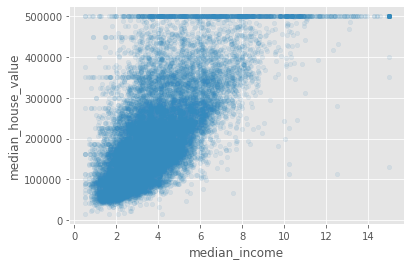

In [11]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)


## Valores Nulos

In [12]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Valores Não numéricos

In [13]:
housing_cat= housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


# 2 - Preparação dos dados

## Criar TRAIN SET e TEST SET

#### Para criar o "train set" e o "test set" é utilizado a função do Scikit-Learn train_test_split, pegando 20% do dataset e fixando uma seed para gerar sempre os mesmos dados

In [14]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=34)

In [15]:
train_set.shape

(16512, 10)

In [16]:
test_set.shape

(4128, 10)

In [17]:
#separando x e y para aplicação das transformações
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

## Tratamento de nulos

In [18]:
#função SimpleImputer para substituir valores nulos pela mediana
imputer = SimpleImputer(strategy="median")

In [19]:
#criando uma copia sem ocean_proximity(valor não numerico) para inserir a instancia inputer
housing_num = housing.drop("ocean_proximity", axis=1)


#### Housing_nun recebe a mediana de cada atributo, apesar de apenas o total_bedrooms ter valores nulos é uma boa pratica aplicar o imputer para todos atributos numericos


In [20]:
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [21]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2121.    ,  433.    , 1166.    ,
        409.    ,    3.5309])

In [22]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [23]:
housing_tr.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

## Tratamento de atributos categóricos

#### Como visto anteriormente, o atributo ocean_proximity é de texto, o que impossibilita as transformações do dado por mediana, por isso é necessário aplicar um encoder para converter o dado de texto para número 

In [24]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)


,ocean_proximity
7067,<1H OCEAN
18972,INLAND
10877,<1H OCEAN
20440,<1H OCEAN
15424,<1H OCEAN
20222,NEAR OCEAN
16512,INLAND
2622,NEAR OCEAN
6033,INLAND
3421,<1H OCEAN


#### Para o encoder, é usando o one hot enconder, onde não se considera a similaridade de dois valores distintos, que seria util em um caso de classificação

In [25]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [26]:
#convertendo para um Numpy Array
housing_cat_1hot.toarray()


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [27]:
cat_encoder.categories_




[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Transformações

#### Classe transformer contendo um hiperparâmetro, add_bedrooms_per_room,definido como True por padrão. Este hiperparametro permitirá que se descubra facilmente se adicionar este atributo ajuda algoritmos de machine learning ou não. De maneira mais geral, pode-se adicionar um hiperparâmetro para bloquear qualquer etapa de preparação de dados sobre a qual não se tem 100% de certeza. Quanto mais se automatizar essas etapas de preparação de dados,  mais combinações pode-se experimentar automaticamente, tornando muito mais provável encontrar uma ótima combinação (salvando muito tempo)

In [28]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

#CLASSE RETIRADA DO LIVRO Hands-On Machine Learning with Scikit-Learn and TensorFlow CAP.2,PG.82

## Escalonamento de valores

#### Algoritmos de machine learning geralmente não performam bem com atributos de diferentes escala, por isso é feito uma normalização de todos para a mesma escala utilizando a função pipeline do Scikit-Learn

In [29]:
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),("cat", OneHotEncoder(), cat_attribs),])
housing_prepared = full_pipeline.fit_transform(housing)


# 3 - MODELAGEM

## Linear Regression

In [30]:
#Algoritmo de Regressão Logistica
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [31]:
#testando LR
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [240874.02559837 196327.61590513 213101.00407325 299120.99450037
 233838.27279264]
Labels: [181100.0, 191300.0, 165300.0, 308100.0, 156900.0]


In [32]:
#Utilizando RMSE pra teste de performance
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68531.24454648655

### Cross-Validation

#### De modo a melhor validar o algoritmo, cross-validation separa o dataset de treinamento em folds cv, onde o modelo ira rodar cv vezes, escolhendo um fold distinto para validar e o resto para treinar (alternando nas cv vezes)

In [33]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)


In [34]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [35]:
display_scores(lin_rmse_scores)

Scores: [68228.40841995 74571.28432766 62298.72211362 71258.20341949
 68436.83572042 68738.77512959 71942.82982668 68538.03613517
 69912.19206699 64394.5049672 ]
Mean: 68831.97921267744
Standard deviation: 3356.495048033714


## DecisionTreeRegressor

In [36]:
#utilizando modelo decisiontreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [37]:
print("Predictions:", tree_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [181100. 191300. 165300. 308100. 156900.]
Labels: [181100.0, 191300.0, 165300.0, 308100.0, 156900.0]


In [38]:
#Overfitting 
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


0.0

### Cross-Validation

In [39]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
 scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [40]:
display_scores(tree_rmse_scores)

Scores: [70168.1839858  70467.20644862 68935.30748525 69467.4672724
 66658.43147726 71931.68933195 71257.30377594 70698.0619087
 73710.9272467  67015.48709901]
Mean: 70031.00660316323
Standard deviation: 2032.1914341027634


## RandomForestRegressor

In [41]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [42]:
print("Predictions:", forest_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [187110.   185123.   167252.   310321.   175789.01]
Labels: [181100.0, 191300.0, 165300.0, 308100.0, 156900.0]


In [43]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18566.871125649006

### Cross-Validation

In [44]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [45]:
display_scores(forest_rmse_scores)

Scores: [49333.68665908 52014.22572521 47711.15773906 51957.59656424
 50460.27322737 49095.99732769 50887.19036078 49881.18735616
 53012.1195453  46635.98904186]
Mean: 50098.942354676765
Standard deviation: 1889.2828106537536


#### Como o modelo RFR apresenta o melhor resultado, é o que será utilizado para continuar com o hypertraining tunnig

## HYPERTRAINING TUNING

## Encontrando os hyperparâmtros

In [46]:
#GridSearchCV ira buscar os melhores hyperparâmetros para a random forest 
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

#### Melhores parâmetros encontrados

In [47]:
grid_search.best_params_


{'max_features': 6, 'n_estimators': 30}

In [48]:
#Percebe-se o RMSE score quando max_features = 8 e n_estimator=30 superior ao RMSE sem o hypertraining tunning
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


65225.57871343726 {'max_features': 2, 'n_estimators': 3}
55759.90283518163 {'max_features': 2, 'n_estimators': 10}
53102.37383029142 {'max_features': 2, 'n_estimators': 30}
60306.57513667079 {'max_features': 4, 'n_estimators': 3}
52730.40796542245 {'max_features': 4, 'n_estimators': 10}
50815.23329164837 {'max_features': 4, 'n_estimators': 30}
59481.12996434158 {'max_features': 6, 'n_estimators': 3}
52584.79706657595 {'max_features': 6, 'n_estimators': 10}
50165.28982274669 {'max_features': 6, 'n_estimators': 30}
58336.59803473627 {'max_features': 8, 'n_estimators': 3}
52302.5964810409 {'max_features': 8, 'n_estimators': 10}
50367.298560131305 {'max_features': 8, 'n_estimators': 30}
62522.81452268361 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54306.30655930904 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59579.59702068735 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53128.734030889216 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [49]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances


array([7.40033970e-02, 6.61098361e-02, 4.55169775e-02, 1.71259881e-02,
       1.59491984e-02, 1.77040244e-02, 1.58910888e-02, 3.30057966e-01,
       5.28879296e-02, 1.13206973e-01, 9.59972787e-02, 1.37075189e-02,
       1.26468159e-01, 2.60623607e-04, 6.48617294e-03, 8.62686897e-03])

In [50]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)


[(0.33005796559362477, 'median_income'),
 (0.1264681589290239, 'INLAND'),
 (0.11320697260420619, 'pop_per_hhold'),
 (0.09599727868740417, 'bedrooms_per_room'),
 (0.07400339695926787, 'longitude'),
 (0.06610983609968188, 'latitude'),
 (0.05288792959367215, 'rooms_per_hhold'),
 (0.045516977463037976, 'housing_median_age'),
 (0.01770402437787, 'population'),
 (0.017125988054782285, 'total_rooms'),
 (0.01594919843621386, 'total_bedrooms'),
 (0.015891088764008823, 'households'),
 (0.013707518913037085, '<1H OCEAN'),
 (0.008626868972296742, 'NEAR OCEAN'),
 (0.006486172944608358, 'NEAR BAY'),
 (0.0002606236072638847, 'ISLAND')]

## Validação no Test Set

#### Agora com o modelo final da Random Forest aprimorado com o Hypertraining tunning pode-se testar no Test Set

In [51]:
final_model = grid_search.best_estimator_
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [52]:
final_predictions

array([231256.7       ,  88336.66666667, 210606.66666667, ...,
       295513.33333333,  78636.66666667, 182966.66666667])

In [53]:
final_rmse

48038.30440449171

In [54]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,loc=squared_errors.mean(),scale=stats.sem(squared_errors)))


array([45848.15586293, 50132.86331426])